In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv
/kaggle/input/perfora/performance_table (tc2).csv


In [35]:
tdf = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
tdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:

tdf= tdf[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
      'Pressure9am', 'Pressure3pm','Humidity9am','Humidity3pm']]
tdf.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0


In [37]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
dtypes: float64(10), object(2)
memory usage: 13.3+ MB


In [38]:
tdf.shape

(145460, 12)

In [39]:
tdf.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Pressure9am      15065
Pressure3pm      15028
Humidity9am       2654
Humidity3pm       4507
dtype: int64

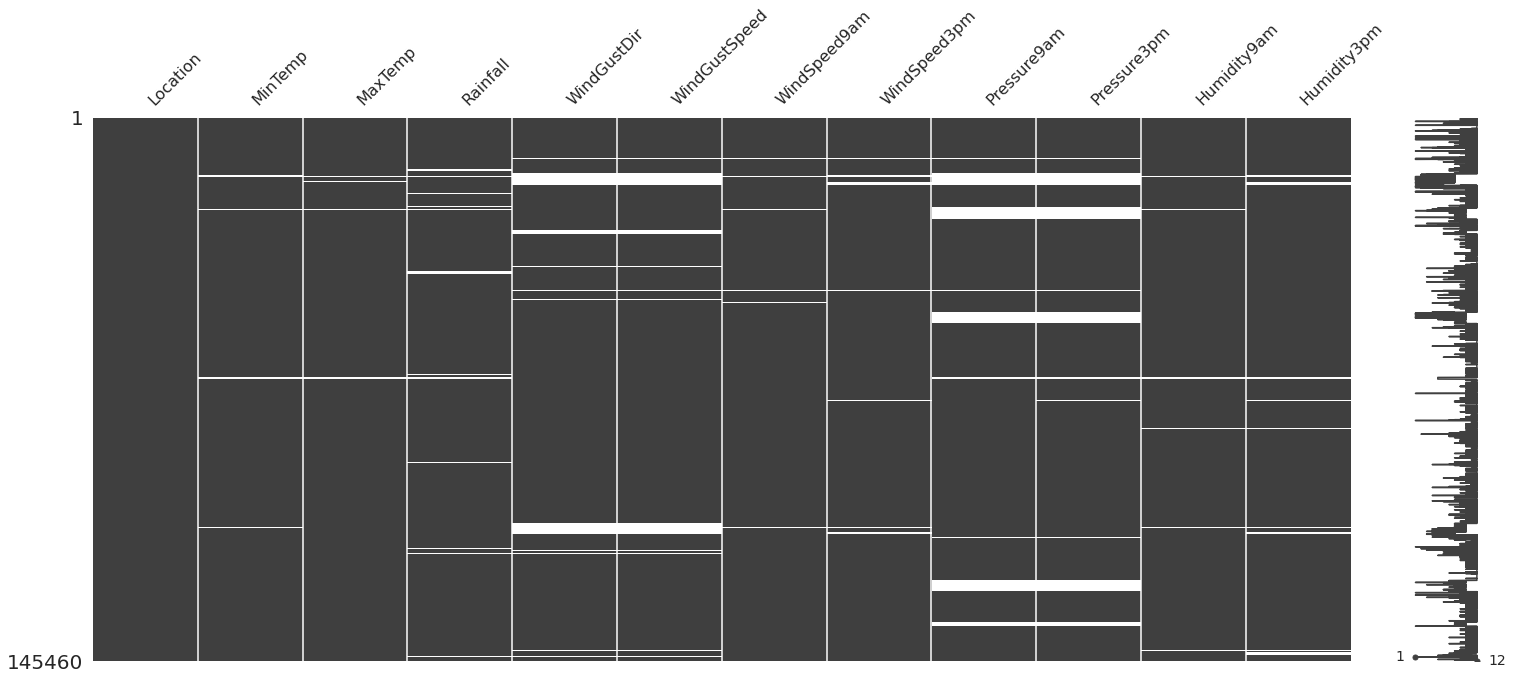

In [41]:
import missingno as msno
msno.matrix(tdf);

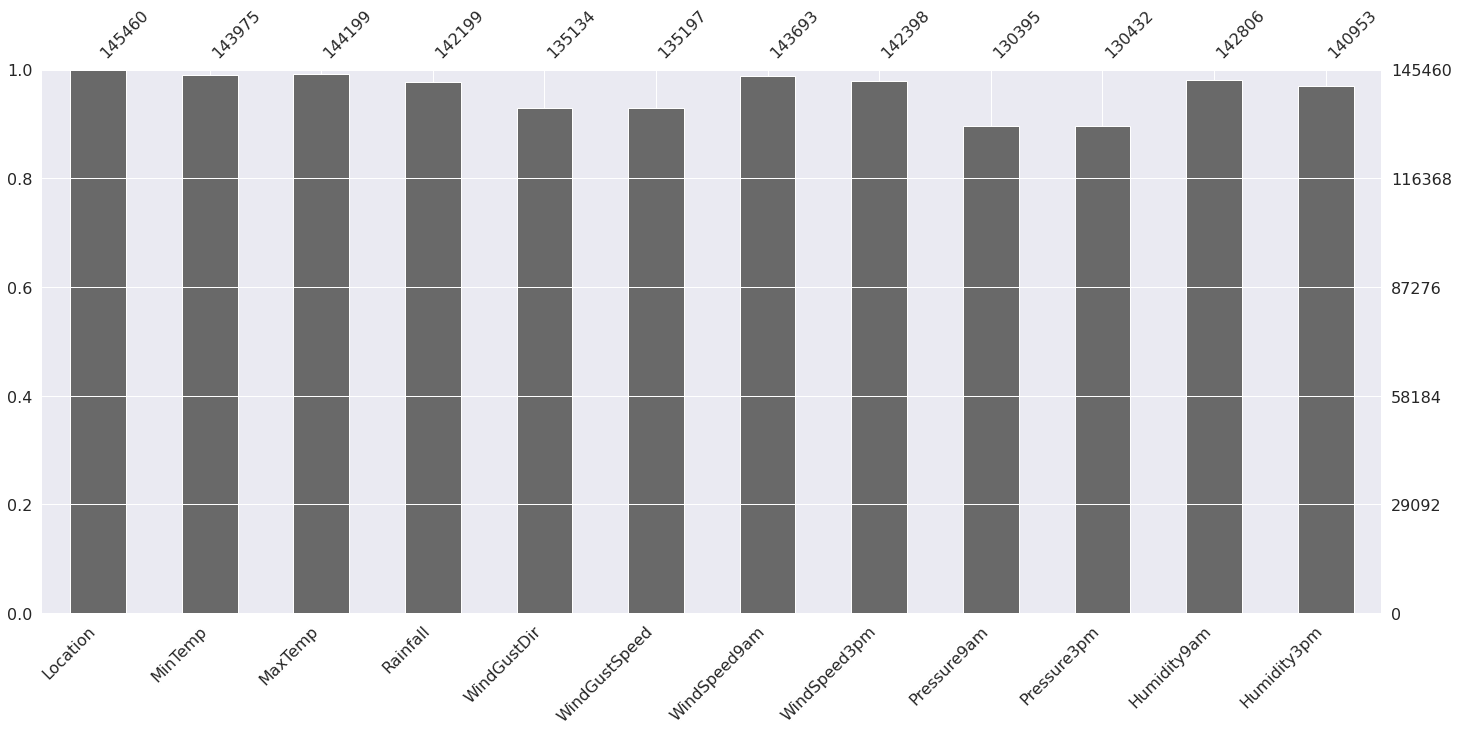

In [43]:
msno.bar(tdf);

In [44]:
tdf.dropna(inplace=True)

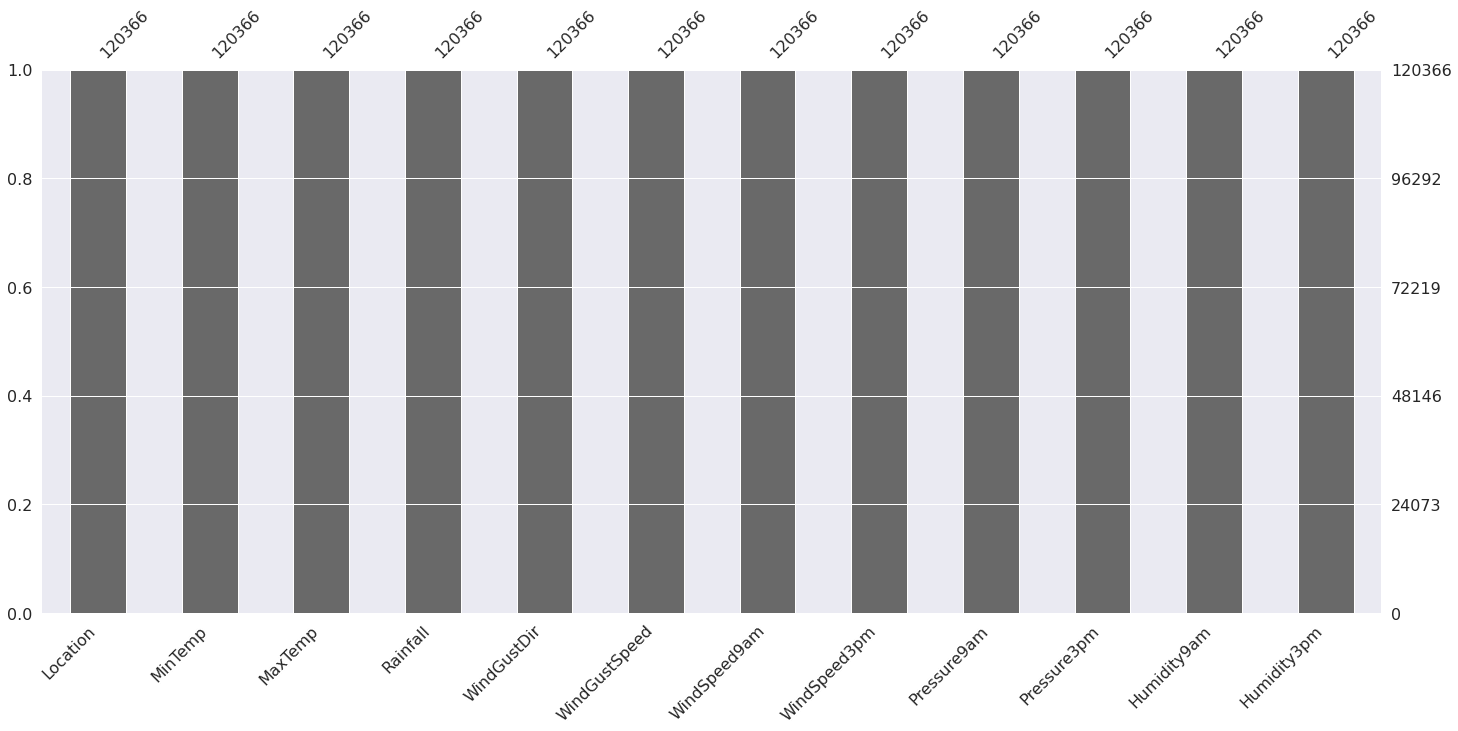

In [45]:
msno.bar(tdf);

In [46]:
tdf.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,120366.0,12.389435,6.363118,-8.2,7.8,12.1,17.0,33.9
MaxTemp,120366.0,23.483479,6.983335,2.6,18.1,22.9,28.5,48.1
Rainfall,120366.0,2.327709,8.473447,0.0,0.0,0.0,0.6,367.6
WindGustSpeed,120366.0,40.120840,13.487106,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,120366.0,14.376161,8.805772,0.0,7.0,13.0,20.0,87.0
WindSpeed3pm,120366.0,19.086727,8.678411,0.0,13.0,19.0,24.0,87.0
Pressure9am,120366.0,1017.654834,7.098417,980.5,1013.0,1017.6,1022.4,1041.0
Pressure3pm,120366.0,1015.253068,7.018884,977.1,1010.5,1015.2,1020.0,1039.6
Humidity9am,120366.0,68.298033,19.118671,0.0,56.0,69.0,82.0,100.0
Humidity3pm,120366.0,50.883539,20.690020,0.0,36.0,51.0,65.0,100.0


In [47]:
tdf['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland',
       'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast',
       'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
       'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole',
       'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
       'Uluru'], dtype=object)

In [48]:
len(tdf['Location'].unique())

44

In [49]:
len(tdf['WindGustDir'].unique())

16

In [50]:
tdf.shape

(120366, 12)

In [51]:
tdf.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Pressure9am      float64
Pressure3pm      float64
Humidity9am      float64
Humidity3pm      float64
dtype: object

In [52]:
sp = tdf['Location'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perth,Hobart,Darwin,Brisbane,Adelaide,Townsville,Canberra,Mildura,MelbourneAirport,Albury,...,PearceRAAF,CoffsHarbour,Witchcliffe,Williamtown,Melbourne,Sydney,Launceston,Nhil,Uluru,Katherine
Location,3175,3147,3142,3113,3058,3008,3008,2993,2983,2979,...,2616,2592,2546,2423,2411,2272,1847,1563,1483,697


In [53]:
tdf.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
MinTemp,1.000000,0.730722,0.110986,0.196310,0.201961,0.174692,-0.452112,-0.462707,-0.245643,0.022310
MaxTemp,0.730722,1.000000,-0.070155,0.088774,0.031529,0.043346,-0.329208,-0.423019,-0.523531,-0.498399
Rainfall,0.110986,-0.070155,1.000000,0.132387,0.089173,0.062333,-0.169714,-0.129392,0.225787,0.256859
WindGustSpeed,0.196310,0.088774,0.132387,1.000000,0.601903,0.689313,-0.458755,-0.414750,-0.219663,-0.035175
WindSpeed9am,0.201961,0.031529,0.089173,0.601903,1.000000,0.513806,-0.230518,-0.179900,-0.269315,-0.029012
WindSpeed3pm,0.174692,0.043346,0.062333,0.689313,0.513806,1.000000,-0.300413,-0.261476,-0.132529,0.032667
Pressure9am,-0.452112,-0.329208,-0.169714,-0.458755,-0.230518,-0.300413,1.000000,0.961613,0.142009,-0.027871
Pressure3pm,-0.462707,-0.423019,-0.129392,-0.414750,-0.179900,-0.261476,0.961613,1.000000,0.189555,0.051186
Humidity9am,-0.245643,-0.523531,0.225787,-0.219663,-0.269315,-0.132529,0.142009,0.189555,1.000000,0.674924
Humidity3pm,0.022310,-0.498399,0.256859,-0.035175,-0.029012,0.032667,-0.027871,0.051186,0.674924,1.000000


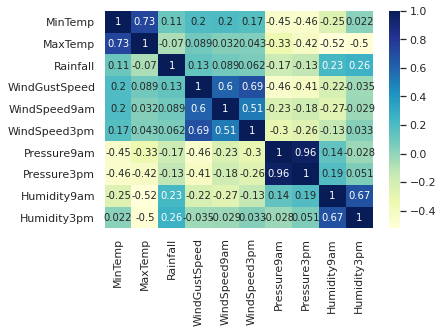

In [54]:
sns.heatmap(tdf.corr(), annot=True, cmap='YlGnBu');

<AxesSubplot:>

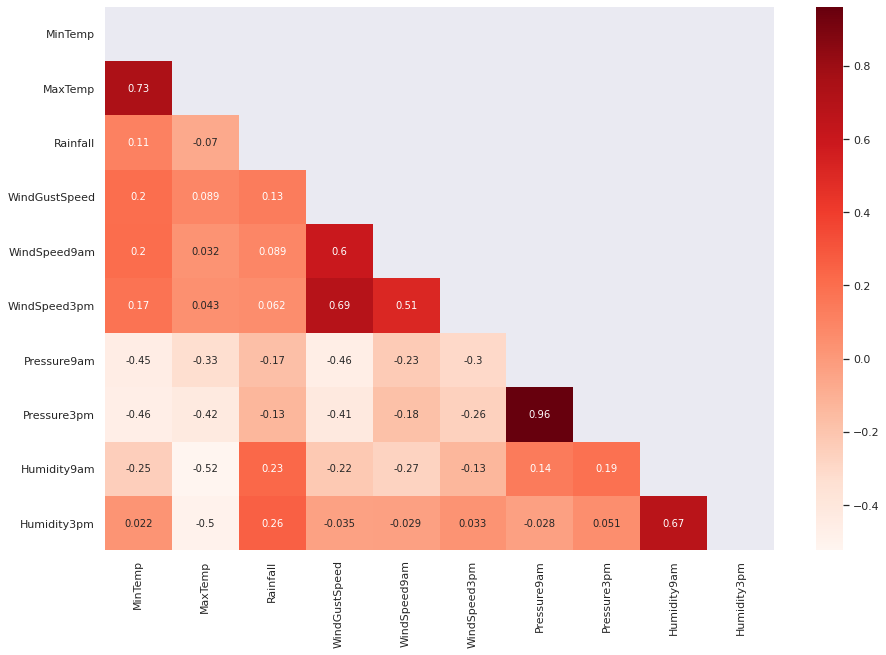

In [56]:
mask = np.zeros_like(tdf.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(tdf.corr(), annot=True, mask=mask, cmap='Reds')

In [57]:
dmy = pd.get_dummies(tdf, drop_first=True)
X = dmy.drop(['MaxTemp'], axis=1)
y = dmy['MaxTemp']

# ML Modelling
# Data setimizi Train ve Test olarak Bölelim

In [58]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42 )

In [60]:
print (' Test ve Train veri setlerindeki gözlem sayıları...')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

 Test ve Train veri setlerindeki gözlem sayıları...
X_train:  (96292, 67)
y_train:  (96292,)
X_test:  (24074, 67)
y_test:  (24074,)


In [62]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [63]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  82.13868773937999
Model coefficients:  [ 8.23366711e-01  2.57302760e-03 -8.00048399e-04 -9.72629551e-02
 -9.56629824e-03  4.77284927e-01 -5.37070940e-01 -3.30685447e-02
 -1.39670994e-01  2.55738897e+00  1.51911048e+00  3.01245044e+00
  3.48252632e+00  2.67558963e+00  5.45249733e-01  1.75208092e+00
  2.88240348e+00  6.62037116e-01  2.30828897e+00  3.82425735e+00
  1.28428417e+00  1.99933410e+00 -3.52524593e-01  3.66441722e+00
  1.93627978e+00  4.89985554e-01  1.98992971e+00  2.34844262e+00
  2.43032905e+00  3.25116259e+00  3.39600991e+00  1.15953981e+00
 -1.11742081e-01  2.13625487e+00  3.19715573e+00  1.98100095e+00
  2.54939549e+00  2.30374274e+00  2.70004689e+00  3.35634407e+00
  1.85901637e-01  5.29945946e-01  1.24448243e+00  2.25238442e+00
  1.97608835e+00  2.34191611e+00  2.17682801e+00  1.89553752e+00
  3.02127236e+00  3.00186770e+00  1.57777671e-01  1.02927740e+00
  8.64410920e-02 -1.73091866e-01 -1.21874201e-01  1.06596922e-01
 -6.70405750e-03 -7.43068530e-02 

In [64]:
Train=model.score(X_train, y_train)
Train

0.8643181717086408

In [65]:
Test = model.score(X_test, y_test)
Test

0.8639331201411697

In [66]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

2.572790158790224

In [67]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2')

array([0.8681112 , 0.8598419 , 0.8612252 , 0.8657578 , 0.86662031,
       0.86153119, 0.86521229, 0.8623618 , 0.86683166, 0.86331543])

In [68]:
Cross_Val= cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean()
Cross_Val

0.8640808782981274

Model R2 value (0,8643) and cross validation R2 value (0,8642) are almost identical, we can conclude that there is no overfitting.

In [70]:
Score=  [Train, Test, Cross_Val]
dic = {'R2_Score':Score}

pd.DataFrame(dic).T.rename(columns={ 0:'Train',1:'Test', 2:'Cross_Val'})

,Train,Test,Cross_Val
R2_Score,0.864318,0.863933,0.864081


 # Ridge regresyon modeli

In [71]:
ridge_model = Ridge().fit(X_train, y_train)

In [142]:
ridge_model

Ridge(alpha=0.0001)

In [73]:
ridge_model.score(X_train, y_train) , ridge_model.score(X_test, y_test)

(0.864317487592467, 0.8639333922221928)

In [74]:
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

(2.572796644865637, 2.5739895547405656)

In [75]:
ridge_model = Ridge(alpha=10000).fit(X_train, y_train)
ridge_model

Ridge(alpha=10000)

In [76]:
ridge_model.score(X_train, y_train) , ridge_model.score(X_test, y_test)

(0.8483563571620047, 0.8491578516856763)

In [77]:
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

(2.7199168447488216, 2.7101439296011707)

In [78]:
np.linspace(100,0.0001,100)

array([1.00000e+02, 9.89899e+01, 9.79798e+01, 9.69697e+01, 9.59596e+01,
       9.49495e+01, 9.39394e+01, 9.29293e+01, 9.19192e+01, 9.09091e+01,
       8.98990e+01, 8.88889e+01, 8.78788e+01, 8.68687e+01, 8.58586e+01,
       8.48485e+01, 8.38384e+01, 8.28283e+01, 8.18182e+01, 8.08081e+01,
       7.97980e+01, 7.87879e+01, 7.77778e+01, 7.67677e+01, 7.57576e+01,
       7.47475e+01, 7.37374e+01, 7.27273e+01, 7.17172e+01, 7.07071e+01,
       6.96970e+01, 6.86869e+01, 6.76768e+01, 6.66667e+01, 6.56566e+01,
       6.46465e+01, 6.36364e+01, 6.26263e+01, 6.16162e+01, 6.06061e+01,
       5.95960e+01, 5.85859e+01, 5.75758e+01, 5.65657e+01, 5.55556e+01,
       5.45455e+01, 5.35354e+01, 5.25253e+01, 5.15152e+01, 5.05051e+01,
       4.94950e+01, 4.84849e+01, 4.74748e+01, 4.64647e+01, 4.54546e+01,
       4.44445e+01, 4.34344e+01, 4.24243e+01, 4.14142e+01, 4.04041e+01,
       3.93940e+01, 3.83839e+01, 3.73738e+01, 3.63637e+01, 3.53536e+01,
       3.43435e+01, 3.33334e+01, 3.23233e+01, 3.13132e+01, 3.030

Text(0.5, 1.0, 'Ridge Katsayıları')

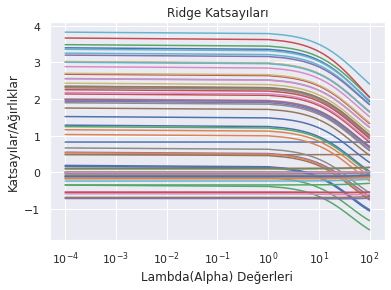

In [80]:
lambdalar = np.linspace(100,0.0001,100)
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax=plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Ridge Katsayıları')

In [81]:
alphaCV = RidgeCV(alphas = lambdalar, 
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

In [82]:
alphaCV.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e+02, 9.89899e+01, 9.79798e+01, 9.69697e+01, 9.59596e+01,
       9.49495e+01, 9.39394e+01, 9.29293e+01, 9.19192e+01, 9.09091e+01,
       8.98990e+01, 8.88889e+01, 8.78788e+01, 8.68687e+01, 8.58586e+01,
       8.48485e+01, 8.38384e+01, 8.28283e+01, 8.18182e+01, 8.08081e+01,
       7.97980e+01, 7.87879e+01, 7.77778e+01, 7.67677e+01, 7.57576e+01,
       7.47475e+01, 7.37374e+01, 7.27...
       2.42425e+01, 2.32324e+01, 2.22223e+01, 2.12122e+01, 2.02021e+01,
       1.91920e+01, 1.81819e+01, 1.71718e+01, 1.61617e+01, 1.51516e+01,
       1.41415e+01, 1.31314e+01, 1.21213e+01, 1.11112e+01, 1.01011e+01,
       9.09100e+00, 8.08090e+00, 7.07080e+00, 6.06070e+00, 5.05060e+00,
       4.04050e+00, 3.03040e+00, 2.02030e+00, 1.01020e+00, 1.00000e-04]),
        normalize=True, scoring='neg_mean_squared_error')

In [83]:
alphaCV.alpha_

0.0001

In [84]:
alphaCV.coef_

array([ 8.23085562e-01,  2.53009264e-03, -8.06111916e-04, -9.72888768e-02,
       -9.58292485e-03,  4.75304508e-01, -5.35187592e-01, -3.30745875e-02,
       -1.39687423e-01,  2.54978975e+00,  1.51393056e+00,  3.00573774e+00,
        3.47280215e+00,  2.66710498e+00,  5.40320518e-01,  1.74834152e+00,
        2.87382112e+00,  6.55626221e-01,  2.30222152e+00,  3.81473247e+00,
        1.28163229e+00,  1.99449397e+00, -3.62151981e-01,  3.66193120e+00,
        1.92635421e+00,  4.82084358e-01,  1.98139216e+00,  2.34114247e+00,
        2.42492443e+00,  3.24215172e+00,  3.38797983e+00,  1.15335661e+00,
       -1.18077563e-01,  2.12826352e+00,  3.19044772e+00,  1.97441441e+00,
        2.54279015e+00,  2.29429061e+00,  2.69363439e+00,  3.34793487e+00,
        1.80067513e-01,  5.24284466e-01,  1.24034170e+00,  2.24436249e+00,
        1.97137677e+00,  2.33463863e+00,  2.16875392e+00,  1.88729057e+00,
        3.01495698e+00,  2.99358340e+00,  1.51691405e-01,  1.02310994e+00,
        8.69760183e-02, -

In [87]:
ridge_tuned = Ridge(alpha= alphaCV.alpha_,
                   normalize = True).fit(X_train,y_train)

In [88]:
Train_R=ridge_tuned.score(X_train,y_train)
Train_R

0.8643179293948332

In [89]:
Test_R=ridge_tuned.score(X_test,y_test)
Test_R

0.8639291339118402

In [90]:
Cross_Val_R= cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = 'r2').mean()
Cross_Val_R

0.8640808783032325

In [91]:
ridge_tuned.score(X_test,y_test), np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

(0.8639291339118402, 2.5740298319283035)

In [93]:
Score_R=  [Train_R, Test_R, Cross_Val_R]
dic_R = {'R2_Score':Score_R}

pd.DataFrame(dic_R).T.rename(columns={ 0:'Train',1:'Test', 2:'Cross_Val'})

,Train,Test,Cross_Val
R2_Score,0.864318,0.863929,0.864081


# Lasso Regresyon modeli

In [94]:
lasso_model = Lasso().fit(X_train, y_train)

In [95]:
lasso_model

Lasso()

In [96]:
lasso_model.score(X_train, y_train) , lasso_model.score(X_test, y_test)

(0.8236047882795805, 0.8227549163014195)

In [97]:
np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))

(2.9335055777817263, 2.9377720882449383)

In [98]:
np.sum(lasso_model.coef_!=0)

6

In [99]:
lasso_model.coef_

array([ 0.76972654, -0.        , -0.01500144, -0.09160379, -0.        ,
        0.        , -0.07776679, -0.01592705, -0.16123809,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ])

In [100]:
lasso_model_cv = LassoCV(alphas = None, cv = 10, max_iter =1000, normalize = True)

In [101]:
lasso_model_cv.fit(X_train, y_train)

LassoCV(cv=10, normalize=True)

In [102]:
lasso_model_cv.alpha_

1.6473781485413107e-05

In [104]:
lasso_optimum = Lasso(alpha= lasso_model_cv.alpha_) 

In [105]:
lasso_optimum.fit(X_train, y_train)

Lasso(alpha=1.6473781485413107e-05)

In [106]:
Train_L=lasso_optimum.score(X_train, y_train) 
Train_L

0.8643178067123105

In [107]:
Test_L=lasso_optimum.score(X_test, y_test)
Test_L

0.8639335035836284

In [108]:
Cross_Val_L= cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = 'r2').mean()
Cross_Val_L

0.8235342550557736

In [109]:
np.sqrt(mean_squared_error(y_train, lasso_model_cv.predict(X_train))) , np.sqrt(mean_squared_error(y_test, lasso_model_cv.predict(X_test)))

(2.576733976993278, 2.5778724868446523)

In [110]:
Score_L=  [Train_L, Test_L, Cross_Val_L]
dic_L = {'R2_Score':Score_L}

pd.DataFrame(dic_L).T.rename(columns={ 0:'Train',1:'Test', 2:'Cross_Val'})

,Train,Test,Cross_Val
R2_Score,0.864318,0.863934,0.823534


# ElasticNet regresyonu

In [111]:
from sklearn.linear_model import ElasticNet

In [112]:
elas_model = ElasticNet().fit(X_train, y_train)

In [113]:
elas_model.coef_ , elas_model.intercept_

(array([ 0.76826963, -0.        , -0.01413327, -0.09250962, -0.        ,
         0.15917365, -0.24013994, -0.01770602, -0.15679326,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        ]),
 106.8662235306

In [114]:
elas_model.score(X_train, y_train) , elas_model.score(X_test, y_test) 

(0.8332835666904568, 0.8330792239985532)

In [116]:
y_tahmin = elas_model.predict(X_test)

In [117]:
y_tahmin

array([25.67788144, 22.61660768, 20.87094815, ..., 23.46221743,
       27.37653512, 36.84268015])

In [118]:
np.sqrt(mean_squared_error(y_test, y_tahmin)) 

2.8509276685345393

In [119]:
np.sqrt(mean_squared_error(y_train, elas_model.predict(X_train))), np.sqrt(mean_squared_error(y_test, elas_model.predict(X_test)))

(2.851889719219187, 2.8509276685345393)

In [120]:
 elas_model_cv= ElasticNetCV(cv=10, random_state = 42).fit(X_train,y_train)

In [121]:
elas_model_cv.alpha_

0.14360500040742233

In [122]:
elas_model_cv.coef_

array([ 0.78842347, -0.00137907, -0.00727332, -0.09147981, -0.0028933 ,
        0.44478875, -0.5170337 , -0.015803  , -0.15144865,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ])

In [123]:
elas_optimum = ElasticNet(alpha = elas_model_cv.alpha_, l1_ratio=0.5).fit(X_train, y_train)
elas_optimum

ElasticNet(alpha=0.14360500040742233)

In [124]:
Train_E= elas_optimum.score(X_train, y_train) 
Test_E=elas_optimum.score(X_test, y_test)

In [125]:
Train_E

0.8417207092051618

In [126]:
Test_E

0.8426228730297625

In [127]:
np.sqrt(mean_squared_error(y_train, elas_optimum.predict(X_train))) , np.sqrt(mean_squared_error(y_test, elas_optimum.predict(X_test)))

(2.7787889945189277, 2.768227684982691)

In [143]:
Cross_Val_E= cross_val_score(elas_model, X_train, y_train, cv = 10, scoring = 'r2').mean()
Cross_Val_E

0.8332115276953435

In [129]:
Score_E=  [Train_E, Test_E, Cross_Val_E]
dic_E = {'R2_Score':Score_E}

pd.DataFrame(dic_E).T.rename(columns={ 0:'Train',1:'Test', 2:'Cross_Val'})

,Train,Test,Cross_Val
R2_Score,0.841721,0.842623,0.823534


# Polinom Regresyon


In [145]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)

In [147]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [148]:
poly_model.score(X_train, y_train)

0.9101061909773936

In [102]:
X_test = poly.fit_transform(X_test)

In [103]:
poly_model.score(X_test, y_test)

0.9066230183888638

In [150]:
poly_model.score(X_train, y_train)

0.9101061909773936

In [104]:
np.sqrt(mean_squared_error(y_train,poly_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test,poly_model.predict(X_test)))

(2.09415302660296, 2.132312815209244)

In [105]:
from sklearn.model_selection import cross_val_score

In [149]:
cross_val_score(poly_model, X_train, y_train, cv = 10, scoring = 'r2').mean()

0.9070834264041734